# Выжимка кода предыдущей темы, от которой мы отказались

До выбора данной темы, мы занимались анализом рынка госпитальный препаратов в РФ. Основная задача была:
- Скачать данные о государственных торгах лекарственными препаратами в РФ
- Проанализировать к каким группам заболеваний относятся препараты
- Понять как менялась динамика закупок тех или иных лекарственных препаратов по группам заболеваний

Но в ходе реализации этой темы, мы столкнулись с некоторыми проблемами, которые мы не сможем решить за столь ограниченный промежуток времени.

1. Как забирать торговое наименование или международное непатентованное наименование лекарственного препарата из описания тендера?

Дело в том, что гос тендер на поставку лек средств имеет неудобное описание, например: "Тендер на поставку лекарственного средства нефопам(нефалгин) для целей ЦКБ г.Москва на 2023 год". Из всего этого текста нас интересует лишь "Нефопам" и "Нефалгин". Да и то, что из этого ТН, а что МНН, как это разбивать на группы?

Проблема вычленения ТН и МНН из текста и понимания что перед нами ТН или МНН стала для нас основной, но в каком-то виде с ней мы смогли справить. Был придуман и реализован следующий алгоритм:

1. Был создан словарь grls. Из государственного реестра лекарственных средств была выгружена база всех лек средств зарегистрированных на территории РФ(только они могут быть в обороте на территории РФ). В базе указаны МНН и соответствующие им ТН, однако в более старых препаратов встречались пропуски и недороботки в таблице. По этой базе мы создали словарь, где ключом был МНН, а в значениях был список, в котором хранились все зарегистрированные ТН соответствующие данному МНН. То есть, фактически, это приспособленный под нашу специфическую задачу аналог гос базы лек средств. Ниже приведён код реализации этого словаря:


In [2]:
import pandas as pd


df = pd.read_excel('grls_1.xlsx', header=1, usecols='C:L')
df

,Номер регистрационного удостоверения,Дата регистрации,"Юридическое лицо, на имя которого выдано регистрационное удостоверение",Страна происхождения,Торговое наименование\nлекарственного препарата,Международное непатентованное или химическое наименование,Фармако-терапевтическая группа,Наличие лекарственного препарата в перечне ЖНВЛП,"Наличие в лекарственном препарате наркотических средств, психотропных веществ",Орфанный
0,010675,20.09.2011,"АО ""Галичфарм""",Украина,Строфантин® К,~,кардиотоническое средство - сердечный гликозид,Нет,~,NaN
1,2000/200/1,05.06.2000,Опытный завод АН Республики Башкортостан,Россия,Кальция гопантенат,Гопантеновая кислота,NaN,Нет,Нет,NaN
2,2000/55/1,17.02.2000,ГНИИ особо чистых биопрепаратов,Россия,Рэпоэтин-СП,Эпоэтин альфа,NaN,Нет,Нет,NaN
3,2000/90/1,13.03.2000,Рузам-М ООО,Россия,Рузам концентрат,~,NaN,Нет,Нет,NaN
4,2000/90/2,13.03.2000,Петровакс Лаб ООО,Россия,Полиоксидоний-композиция для лекарственных фор...,Азоксимера бромид,NaN,Нет,Нет,NaN
...,...,...,...,...,...,...,...,...,...,...
20327,ФС-002339,14.03.2023,"Акционерное общество ""Усолье-Сибирский химико-...",Россия,Зидовудин,Зидовудин,противовирусное [ВИЧ] средство,Нет,~,NaN
20328,ФС-002340,24.03.2023,"Общество с ограниченной ответственностью ""Пром...",Россия,Кислород жидкий медицинский,Кислород,~,Нет,~,NaN
20329,ФС-002341,29.03.2023,"Общество с ограниченной ответственностью ""АЛВИ...",Россия,Преднизолон,Преднизолон,~,Нет,~,NaN
20330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Преобразование значений столбцов в нижний регистр
df['Торговое наименование\nлекарственного препарата'] = df['Торговое наименование\nлекарственного препарата'].str.lower()
df['Международное непатентованное или химическое наименование'] = df['Международное непатентованное или химическое наименование'].str.lower()
df = df.rename(columns={
               'Торговое наименование\nлекарственного препарата': 'Торговое наименование лекарственного препарата'})

In [4]:
# Убираем специальные символы из торговых наименований
df["Торговое наименование лекарственного препарата"] = df["Торговое наименование лекарственного препарата"].replace(
    r"[^\w\s]", "", regex=True)

Словарь с применением метода defaultdict и алгоритм "вырезания ТН и МНН" был сгенерирован при помощи ChatGPT(сейчас мы не успели, но позже подгрузим запросы чату по которым он это сделал)

In [5]:
from collections import defaultdict

# Создайте DataFrame с двумя столбцами
df_subset = df[["Международное непатентованное или химическое наименование",
                "Торговое наименование лекарственного препарата"]]
df_subset

,Международное непатентованное или химическое наименование,Торговое наименование лекарственного препарата
0,~,строфантин к
1,гопантеновая кислота,кальция гопантенат
2,эпоэтин альфа,рэпоэтинсп
3,~,рузам концентрат
4,азоксимера бромид,полиоксидонийкомпозиция для лекарственных форм...
...,...,...
20327,зидовудин,зидовудин
20328,кислород,кислород жидкий медицинский
20329,преднизолон,преднизолон
20330,NaN,NaN


In [6]:
grls_dict = defaultdict(set)

for _, row in df_subset.iterrows():
    international_name = row["Международное непатентованное или химическое наименование"]
    trade_name = row["Торговое наименование лекарственного препарата"]

    # Добавьте торговое наименование в список значений для соответствующего международного непатентованного наименования
    grls_dict[international_name].add(trade_name)

# Преобразуйте defaultdict обратно в обычный словарь
grls_dict = dict(grls_dict)

In [7]:
for _, row in df_subset.iterrows():
    international_name = row["Международное непатентованное или химическое наименование"]
    trade_name = row["Торговое наименование лекарственного препарата"]

    # Добавьте торговое наименование в множество значений для соответствующего международного непатентованного наименования
    grls_dict[international_name].add(trade_name)

In [8]:
grls_dict.pop('~', None)

{'венорутон',
 'антитела к морфину аффинно очищенные',
 'табакумплюс',
 'монокомпонентные препараты растительного происхождения согласно приложению  106 наименований',
 'лаквер эдас121',
 'акридонуксусная кислота',
 'флогэнзим',
 'эскулюс композитум',
 'экдистен',
 'трисоль',
 'аллергопент эдас130',
 'тамбуил экстракт',
 'гомеопатические монокомпонентные препараты минерального происхождения 42 наименования  согласно приложению',
 'берталис эдас155вс',
 'успокоительный сбор 2',
 'нормагаст',
 'аркальцит эдас942',
 'кориандра плоды',
 'грудной сбор 2',
 'вобэнзим',
 'солодки экстракт густой',
 'фактор некроза опухолейтимозин альфа1 рекомбинантный',
 'боярышника экстракт жидкий',
 'амтерсол',
 'урологический мочегонный сбор',
 'мастопол',
 'гевискон',
 'пайлекс',
 'гиперикумгф',
 'хаймикс',
 'календулы настойка',
 'гомеовокс',
 'поливитаминная смесь',
 'валерианы корневища с корнями',
 'венофлебин',
 'колибактерин сухой',
 'линекс форте',
 'доктор тайсс эвкалипт',
 'хмеля соплодия',
 'эск

In [10]:
# Итерируйте по ключам и значениям словаря
for key, value_set in grls_dict.items():
    # Создайте новое множество для хранения обновленных значений
    updated_value_set = set()

    # Итерируйте по каждому значению в множестве
    for value in value_set:
        # Удалите пробелы перед первым словом и после последнего слова
        stripped_value = str(value).strip()

        # Добавьте обновленное значение в новое множество
        updated_value_set.add(stripped_value)

    # Замените старое множество новым множеством с обновленными значениями
    grls_dict[key] = updated_value_set

Ниже будет приведён алгоритм вырезания ТН и МНН, и технические комментарии из тетрадки по прошлой теме:

In [18]:
df_1 = pd.read_excel('merged_1.xlsx')
df_1

,Закупки по,Реестровый номер закупки,"Способ определения поставщика (подрядчика, исполнителя), подрядной организации (размещения закупки)",Наименование закупки,Предмет электронного аукциона (только для ПП РФ 615),Идентификационный код закупки,Номер лота,Наименование лота,Начальная (максимальная) цена контракта,Валюта,Начальная (максимальная) цена в валюте контракта,Валюта контракта,Классификация по ОКПД2,Наименование Заказчика,"Организация, осуществляющая размещение",Дата размещения,Этап закупки
0,44-ФЗ,№0869200000223002255,Запрос котировок в электронной форме,на поставку лекарственного препарата для медиц...,NaN,'232745313582774530100100122200000323',NaN,NaN,1682488.5,RUB,NaN,NaN,NaN,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ ЧЕЛЯБИНСКОЙ ОБЛАСТИ,"ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ЦЕНТР ОРГ...",2023-03-27,Определение поставщика завершено
1,44-ФЗ,№0869200000223001055,Запрос котировок в электронной форме,на поставку лекарственного препарата для медиц...,NaN,'232745313582774530100100030220000323',NaN,NaN,1682488.5,RUB,NaN,NaN,NaN,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ ЧЕЛЯБИНСКОЙ ОБЛАСТИ,"ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ЦЕНТР ОРГ...",2023-02-28,Определение поставщика завершено
2,44-ФЗ,№0869200000223002257,Запрос котировок в электронной форме,на поставку лекарственного препарата для медиц...,NaN,'232745313582774530100100122250000323',NaN,NaN,1682488.5,RUB,NaN,NaN,NaN,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ ЧЕЛЯБИНСКОЙ ОБЛАСТИ,"ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ЦЕНТР ОРГ...",2023-03-27,Определение поставщика завершено
3,44-ФЗ,№0303200025122000645,Запрос котировок в электронной форме,Поставка лекарственного препарата на основании...,NaN,'222056204455005720100100032190000323',NaN,NaN,1680177.6,RUB,NaN,NaN,NaN,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ РЕСПУБЛИКИ ДАГЕСТАН,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ РЕСПУБЛИКИ ДАГЕСТАН,2022-08-25,Определение поставщика завершено
4,44-ФЗ,№0165100007922000087,Запрос котировок в электронной форме,Поставка лекарственного препарата для медицинс...,NaN,'222702102165370170100101250012120323',NaN,NaN,1679043.6,RUB,NaN,NaN,NaN,ДЕПАРТАМЕНТ ЗДРАВООХРАНЕНИЯ ТОМСКОЙ ОБЛАСТИ,ДЕПАРТАМЕНТ ЗДРАВООХРАНЕНИЯ ТОМСКОЙ ОБЛАСТИ,2022-04-18,Определение поставщика завершено
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,44-ФЗ,№0873200009822007605,Запрос котировок в электронной форме,Поставка лекарственного препарата (Иммуноглобу...,NaN,'222771433860977140100156253870000323',NaN,NaN,2780610.0,RUB,NaN,NaN,NaN,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,2022-06-28,Определение поставщика завершено
4997,44-ФЗ,№0873200009822007540,Запрос котировок в электронной форме,Поставка лекарственного препарата (Иммуноглобу...,NaN,'222771433860977140100156253310000323',NaN,NaN,2780610.0,RUB,NaN,NaN,NaN,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,2022-06-27,Определение поставщика завершено
4998,44-ФЗ,№0873200009822006659,Запрос котировок в электронной форме,Поставка лекарственного препарата (Иммуноглобу...,NaN,'222771433860977140100138789170000323',NaN,NaN,2780610.0,RUB,NaN,NaN,NaN,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,2022-06-06,Определение поставщика завершено
4999,44-ФЗ,№0873200009822008440,Запрос котировок в электронной форме,Поставка лекарственного препарата (Иммуноглобу...,NaN,'222771433860977140100156258740000323',NaN,NaN,2780610.0,RUB,NaN,NaN,NaN,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,2022-07-19,Определение поставщика завершено


In [19]:
# Ниже мы постро берём каждое слово из столбца "Наименование закупки" и сравниваем со словарём, если оно в нём есть оставляем. Также учитываем случай, когда в csv таблице МНН или ТН могуть быть из двух слов, такой случай тоже проверяем на наличие в словаре grls

import re

data = df_1['Наименование закупки']

df_2 = pd.DataFrame(data)


def find_matching_key(words, grls_dict):
    for i in range(len(words) - 1):
        key = words[i] + " " + words[i + 1]
        if key in grls_dict:
            return (key, True)
        else:
            for values in grls_dict.values():
                if key in values:
                    return (key, False)
    return (None, False)


def find_matching_words(text, grls_dict):
    words = re.findall(r'\b\w+\b', text)
    found_names = []

    for word in words:
        if word in grls_dict.keys():
            found_names.append(word)
        else:
            for key, values in grls_dict.items():
                if word in values:
                    found_names.append(word)
                    break

    # Проверка на сочетание двух слов из словаря
    matching_key, is_key = find_matching_key(words, grls_dict)
    if matching_key:
        if is_key:
            found_names.append(matching_key)
        else:
            for key, values in grls_dict.items():
                if matching_key in values:
                    found_names.append(key)
                    break

    return " ".join(found_names)

df_2['Filtered Names'] = df_2['Наименование закупки'].apply(
    lambda x: find_matching_words(str(x), grls_dict))


df_2.head(3)

,Наименование закупки,Filtered Names
0,на поставку лекарственного препарата для медиц...,
1,на поставку лекарственного препарата для медиц...,
2,на поставку лекарственного препарата для медиц...,


В силу того что код был частично утерян некоторые моменты у нас не совпадают, поэтому прикрепляем скрины

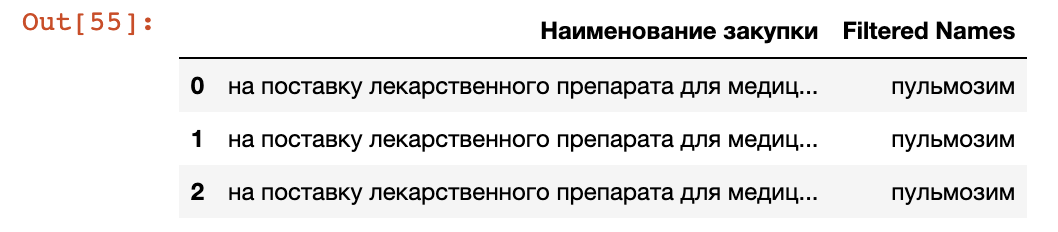

In [20]:
# Заменяем значения в столбце "Наименование закупки" нашими МНН и ТН

df_1['Наименование закупки'] = df_2['Filtered Names']
df_1['Дата размещения'] = pd.to_datetime(df_1['Дата размещения'], format='%d.%m.%Y', dayfirst=True)

df_1.head(5)

,Закупки по,Реестровый номер закупки,"Способ определения поставщика (подрядчика, исполнителя), подрядной организации (размещения закупки)",Наименование закупки,Предмет электронного аукциона (только для ПП РФ 615),Идентификационный код закупки,Номер лота,Наименование лота,Начальная (максимальная) цена контракта,Валюта,Начальная (максимальная) цена в валюте контракта,Валюта контракта,Классификация по ОКПД2,Наименование Заказчика,"Организация, осуществляющая размещение",Дата размещения,Этап закупки
0,44-ФЗ,№0869200000223002255,Запрос котировок в электронной форме,,NaN,'232745313582774530100100122200000323',NaN,NaN,1682488.5,RUB,NaN,NaN,NaN,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ ЧЕЛЯБИНСКОЙ ОБЛАСТИ,"ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ЦЕНТР ОРГ...",2023-03-27,Определение поставщика завершено
1,44-ФЗ,№0869200000223001055,Запрос котировок в электронной форме,,NaN,'232745313582774530100100030220000323',NaN,NaN,1682488.5,RUB,NaN,NaN,NaN,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ ЧЕЛЯБИНСКОЙ ОБЛАСТИ,"ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ЦЕНТР ОРГ...",2023-02-28,Определение поставщика завершено
2,44-ФЗ,№0869200000223002257,Запрос котировок в электронной форме,,NaN,'232745313582774530100100122250000323',NaN,NaN,1682488.5,RUB,NaN,NaN,NaN,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ ЧЕЛЯБИНСКОЙ ОБЛАСТИ,"ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""ЦЕНТР ОРГ...",2023-03-27,Определение поставщика завершено
3,44-ФЗ,№0303200025122000645,Запрос котировок в электронной форме,,NaN,'222056204455005720100100032190000323',NaN,NaN,1680177.6,RUB,NaN,NaN,NaN,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ РЕСПУБЛИКИ ДАГЕСТАН,МИНИСТЕРСТВО ЗДРАВООХРАНЕНИЯ РЕСПУБЛИКИ ДАГЕСТАН,2022-08-25,Определение поставщика завершено
4,44-ФЗ,№0165100007922000087,Запрос котировок в электронной форме,,NaN,'222702102165370170100101250012120323',NaN,NaN,1679043.6,RUB,NaN,NaN,NaN,ДЕПАРТАМЕНТ ЗДРАВООХРАНЕНИЯ ТОМСКОЙ ОБЛАСТИ,ДЕПАРТАМЕНТ ЗДРАВООХРАНЕНИЯ ТОМСКОЙ ОБЛАСТИ,2022-04-18,Определение поставщика завершено


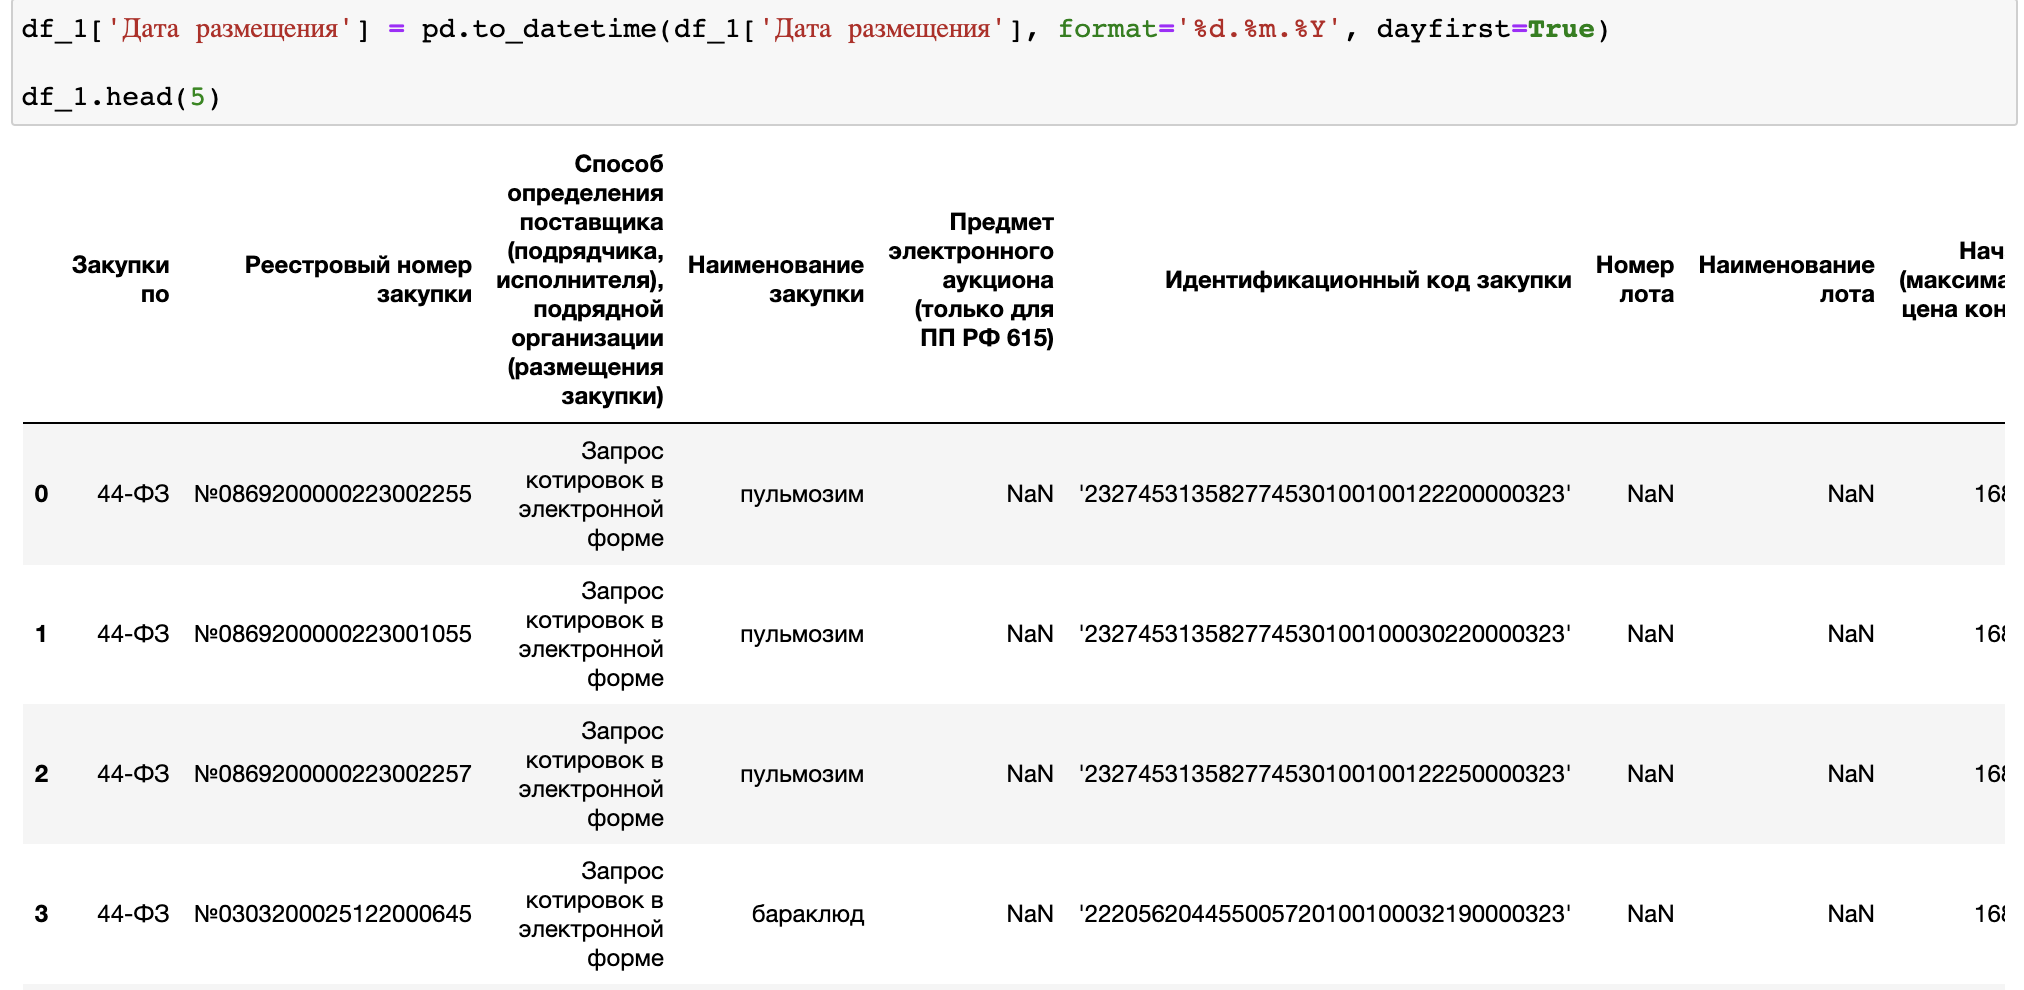

In [21]:
#За счёт того, что в наименовании закупки бывают случаи когда прописан и МНН, и ТН, то они оба совпадают со словарём grls и подгружаются в значения столбца вместе. Для удобства снова смотрим значения столбца "Наименование закупки" и создаём два новых столбца МНН и ТН, где сортируем на МНН и ТН

def find_matching_words(text, grls_dict):
    words = re.findall(r'\b\w+\b', text)
    found_mnn = []
    found_trade_name = []

    for i in range(len(words)):
        word = words[i]

        if word in grls_dict.keys():
            found_mnn.append(word)
        else:
            for key, values in grls_dict.items():
                if word in values:
                    found_trade_name.append(word)
                    break

        if i < len(words) - 1:
            two_words = f"{word} {words[i + 1]}"
            if two_words in grls_dict.keys():
                found_mnn.append(two_words)
            else:
                for key, values in grls_dict.items():
                    if two_words in values:
                        found_trade_name.append(two_words)
                        break

    return " ".join(found_mnn), " ".join(found_trade_name)


df_1[['МНН', 'Торговое наименование']] = df_1.apply(lambda x: find_matching_words(
    x['Наименование закупки'], grls_dict), axis=1, result_type='expand')

Сейчас у нас отсортированы МНН и ТН по каждому тендеру из csv файла. 

Однако в тех тендерах где было указано только ТН не стоит МНН, но мы можем его проставить снова обратившись к словарю. 

Найдя наше ТН в значениях ключа, мы можем поставить ключ в качестве МНН. 

Стоит отметить, что в обратную сторону это не работает. 

Если в тендере указан МНН, то мы не знаем каким ТН играл заказчик, поэтому оставляем столбец ТН пустым. 

Однако даже с этим допущением можно оценить объём рынка препарата по МНН.



In [ ]:
# Этот код добавит функцию find_mnn, которая принимает торговое наименование и словарь GRLS, ищет соответствующий МНН для данного торгового наименования и возвращает его. Затем код проходит по каждой строке DataFrame и обновляет столбец 'МНН', если он пустой, используя найденный МНН.

def find_mnn(trade_name, grls_dict):
    for mnn, trade_names in grls_dict.items():
        if trade_name in trade_names:
            return mnn
    return None


# Проходим по всем строкам таблицы и обновляем столбец 'МНН', если он пустой
for index, row in df_3.iterrows():
    if not row['МНН'] and row['Торговое наименование']:
        mnn = find_mnn(row['Торговое наименование'], grls_dict)
        df_3.at[index, 'МНН'] = mnn

df_3.head(5)

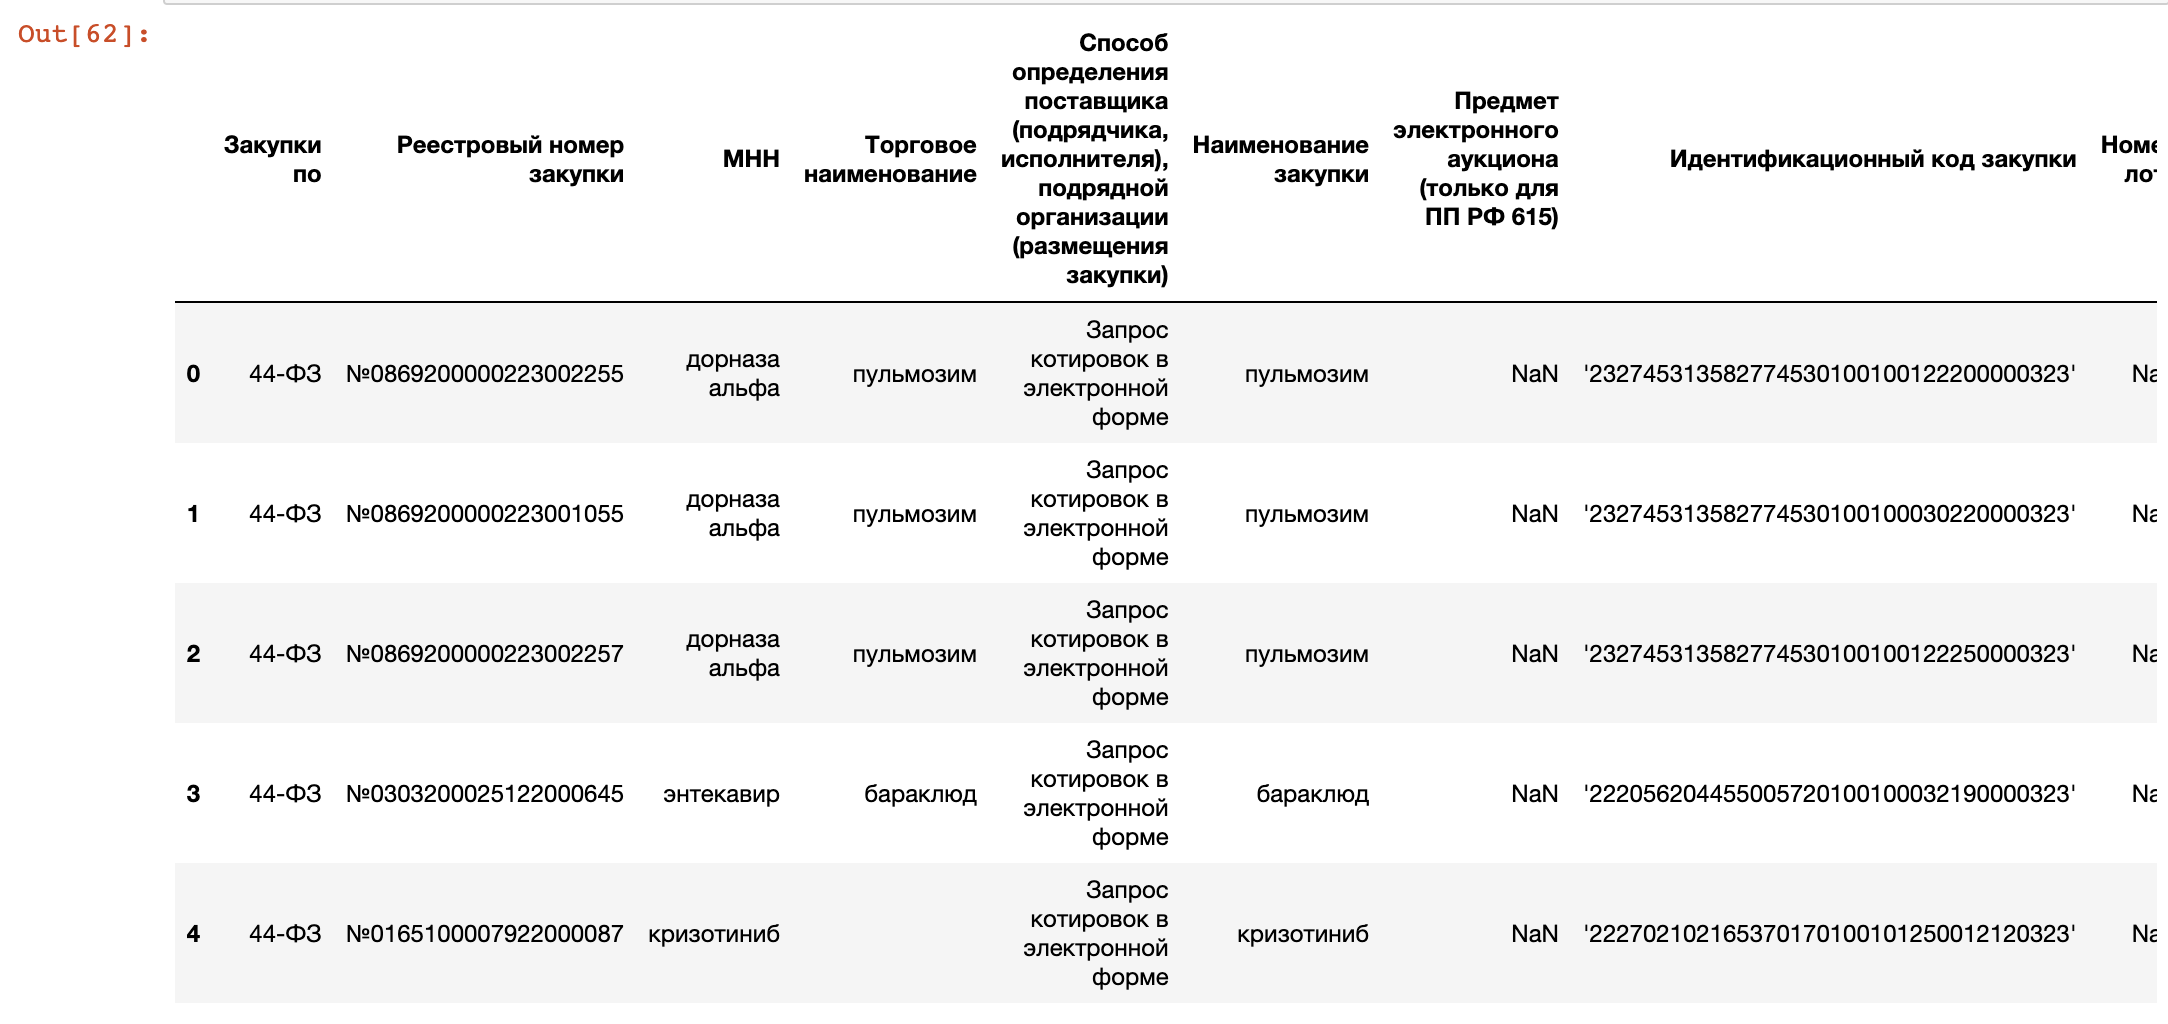

Таким образом был реализован алгоритм сбора МНН и ТН по тендерам. Он уже сам по себе получился громоздким и технически сложным.

Однако нам пришлось отказаться в от этой темы в первую очередь по тому, что мы не до конца разработали план действий. Мы хотели прогнозировать объём рынка в денежном выражении по каждому препарату, но столкнулись с проблемой. Государство может купить 10 упаковок препарата от спинально-мышечной атрофии "Спинраза" на 15 млн. долларов и, например, миллион упаковок противоопухлевого препарата "Анагрелид" на те же 15 млн. доллларов В денежном выражении это одно и то же, и в нашей логики население нуждается в "Спинразе" ровно в таком же количестве как в "Анагрелиде", но это не так.

Хорошо, можно найти цены на все зарегистрированные препараты и находить объём закупки в упаковках. Хотя сама по себе задача найти все цены, спарсить их, грамотно интегрировать - это сложно, а что делать с разными объёмами? Та же зелёнка есть в ампулах 5, 10, 25 мл и канистрах. В наименовании гос закупки, которую мы рассматриваем это не указано. Чтобы понять какой объём упаковки нам нужен в конкретном тендере, необходимо лезть в тендерную документации и искать это там. Как правило, такая документация это файлик ворд или пдф. А как нам автомотизировать этот процесс? Тоже нетривиальная задача...

И в конце концов, лечение каждым препаратом разное. Какого-то препарата достаточно одной упаковки, какой-то пьют курсом в течение года. То есть даже найдя объём препаратов не в денежном выражении, а в натуральном, мы не сможем сделать правильный вывод о группах заболеваний и их динамике в РФ. Для этого нужно изучать инструкцию по применению препарата, смотреть практику применения препаратов и т.п.

Столкнувшись с этими фундаментальными проблемами мы поняли, что не потянем такую тему по времени и по знаниям(на данном этапе)